In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm, skewnorm

In [2]:
x = np.linspace(-20, 20, 1000)
n = 10000
samp10 = skewnorm.rvs(a=-5., loc=12., scale=5., size=(n,))
samp11 = norm.rvs(loc=-10., size=(n,))
samp21 = norm.rvs(loc=10., size=(n,))
y10 = np.vectorize(norm.pdf, excluded=(1,2), signature="()->(n)")(x, samp10, 10.)
y11 = np.vectorize(norm.pdf, excluded=(1,2), signature="()->(n)")(x, samp11, 10.)
y21 = np.vectorize(norm.pdf, excluded=(1,2), signature="()->(n)")(x, samp21, 11.)

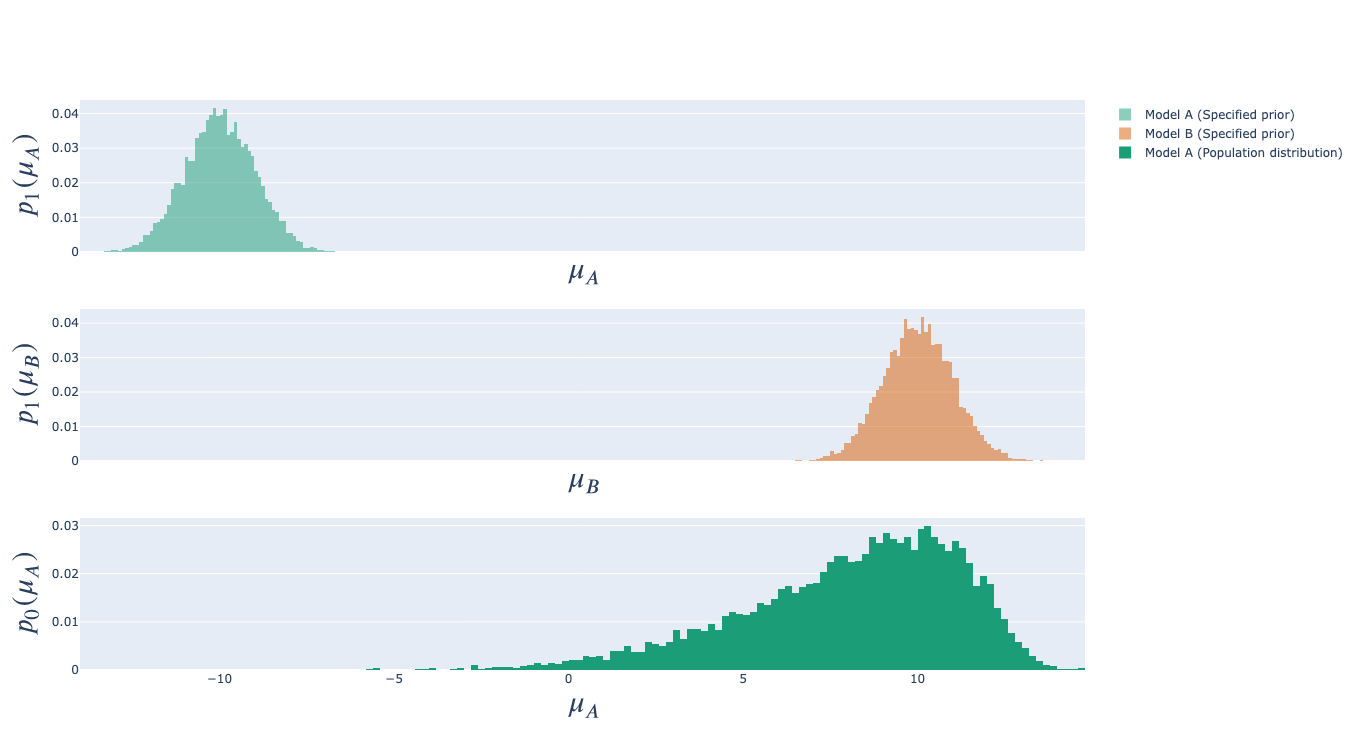

In [3]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, shared_yaxes=True)
fig.add_trace(go.Histogram(
    x=samp11, histnorm="probability", marker=dict(color="rgba(27,158,119,.5)"), 
    name="Model A (Specified prior)"
), row=1, col=1)
fig.add_trace(go.Histogram(
    x=samp21, histnorm="probability", marker=dict(color="rgba(217,95,2,.5)"), 
    name="Model B (Specified prior)"
), row=2, col=1)
fig.add_trace(go.Histogram(
    x=samp10, histnorm="probability", marker=dict(color="rgba(27,158,119,1.)"), 
    name="Model A (Population distribution)"
), row=3, col=1)
fig.update_layout(height=750., width=750.)
fig.update_xaxes(title=r"$\LARGE{\mu_A}$", row=1, col=1)
fig.update_xaxes(title=r"$\LARGE{\mu_B}$", row=2, col=1)
fig.update_xaxes(title=r"$\LARGE{\mu_A}$", row=3, col=1)
fig.update_yaxes(title=r"$\LARGE{p_1(\mu_A)}$", row=1, col=1)
fig.update_yaxes(title=r"$\LARGE{p_1(\mu_B)}$", row=2, col=1)
fig.update_yaxes(title=r"$\LARGE{p_0(\mu_A)}$", row=3, col=1)

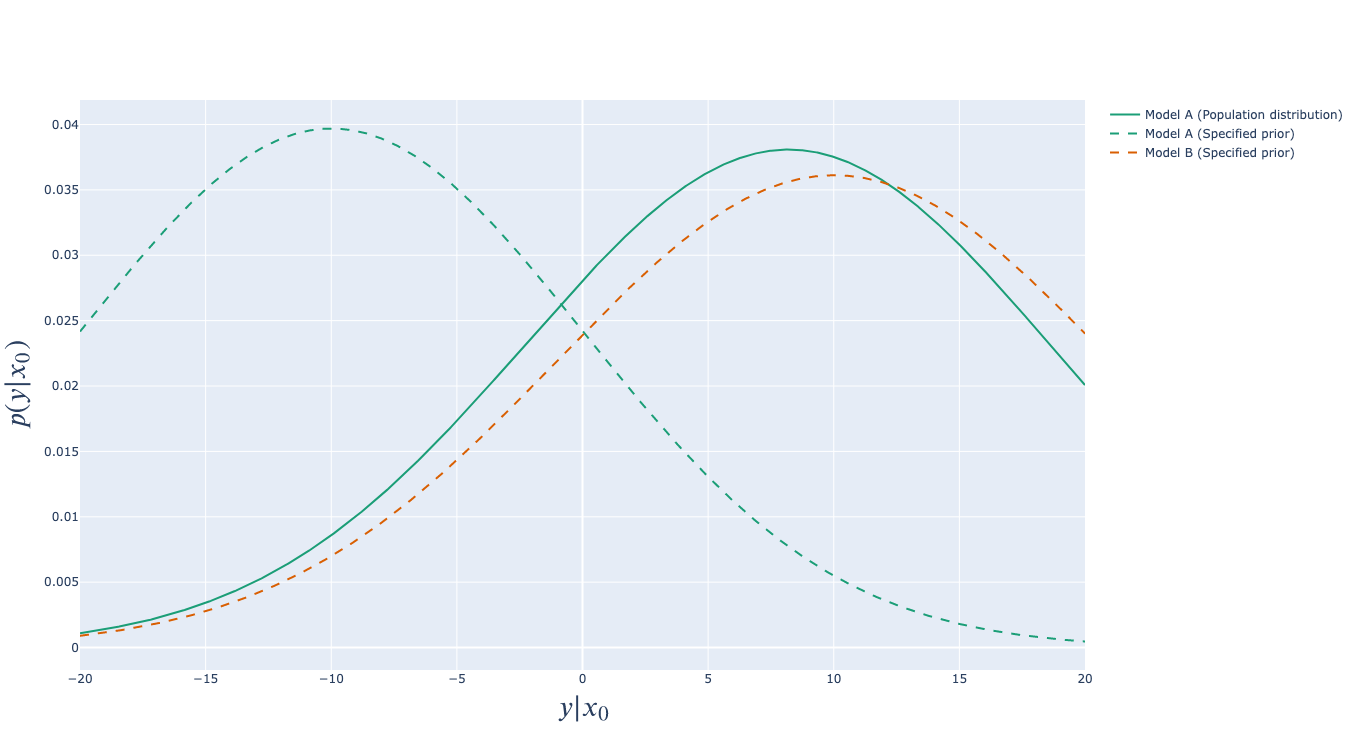

In [4]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(
    x=x, y=y10.mean(axis=1), mode="lines", line=dict(color="rgb(27,158,119)"),
    name="Model A (Population distribution)"
), row=1, col=1)
fig.add_trace(go.Scatter(
    x=x, y=y11.mean(axis=1), mode="lines", 
    line=dict(color="rgb(27,158,119)", dash="dash"), 
    name="Model A (Specified prior)"
), row=1, col=1)
fig.add_trace(go.Scatter(
    x=x, y=y21.mean(axis=1), mode="lines", 
    line=dict(color="rgb(217,95,2)", dash="dash"), 
    name="Model B (Specified prior)"
), row=1, col=1)
fig.update_layout(height=750., width=750.)
fig.update_xaxes(title=r"$\LARGE{y \vert x_0}$")
fig.update_yaxes(title=r"$\LARGE{p(y \vert x_0)}$")